# FEATURE SELECTION

In [1]:
import os

from revex_framework.segmenters import GridSegmenter
from revex_framework.perturbers import MultiplePerturber, SinglePerturber, AllButOnePerturber, AccumPerturber
from revex_framework.utils import load_video, resize_video, center_crop_video, plot_frames

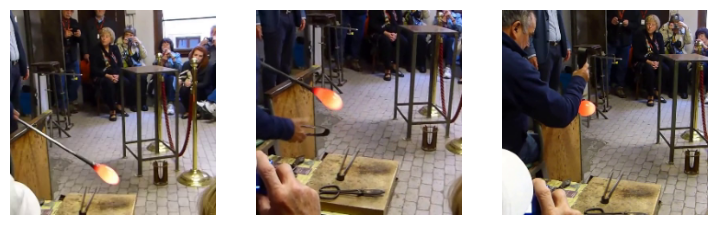

In [3]:
# Load video, rescale and crop
video_path = "../resources/blowing glass.mp4"
video = load_video(video_path)
scale_factor = 224 / min(video.shape[1:3])
video = resize_video(video, scale_factor, scale_factor)
video = center_crop_video(video, 224)

# Temporary save video path
save_path = "../temp"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Show video
plot_frames(video)

## Feature selection

In [4]:
segmenter = GridSegmenter(video)
segments = segmenter.segment(n_seg=[3, 5, 5])
hide_color = 0

### Multiple

  0%|          | 0/6 [00:00<?, ?it/s]

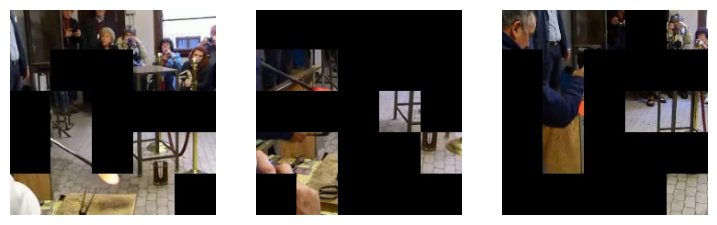

In [5]:
perturber = MultiplePerturber(video, segments, classifier_fn=None, hide_color=hide_color)
data, labels = perturber.perturb(num_samples=5, progress_bar=True, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "1.m4v")))

### Single

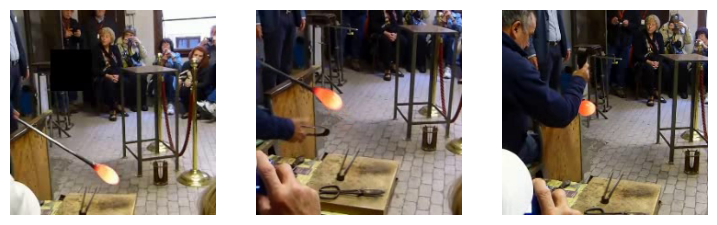

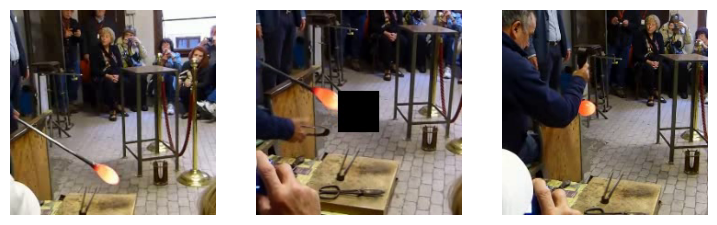

In [13]:
perturber = SinglePerturber(video, segments, classifier_fn=None, hide_color=hide_color)
data, labels = perturber.perturb(progress_bar=True, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "7.m4v")))
plot_frames(load_video(os.path.join(save_path, "38.m4v")))

### All but one

  0%|          | 0/76 [00:00<?, ?it/s]

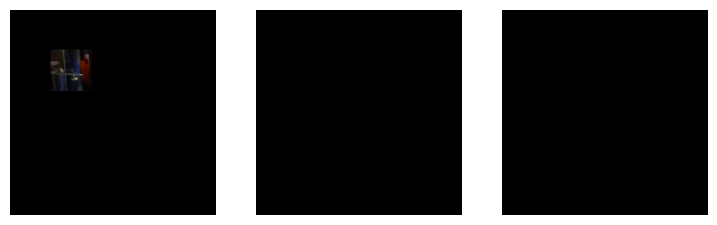

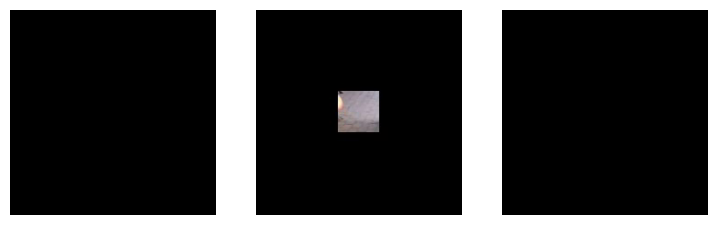

In [14]:
perturber = AllButOnePerturber(video, segments, classifier_fn=None, hide_color=hide_color)
data, labels = perturber.perturb(progress_bar=True, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "6.m4v")))
plot_frames(load_video(os.path.join(save_path, "37.m4v")))

### Accum

  0%|          | 0/77 [00:00<?, ?it/s]

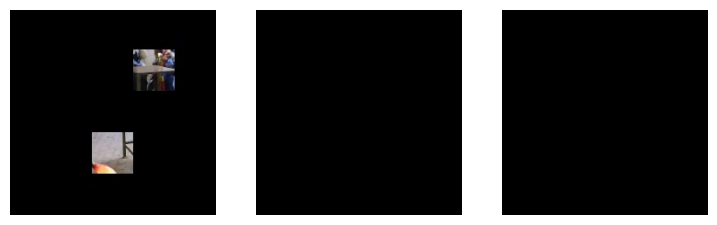

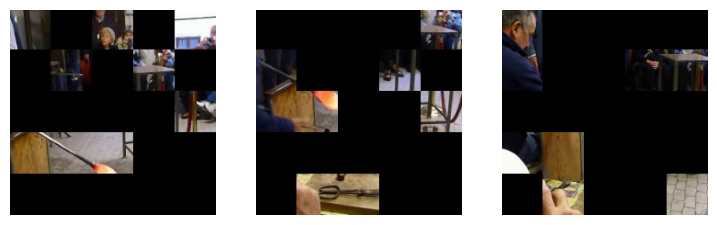

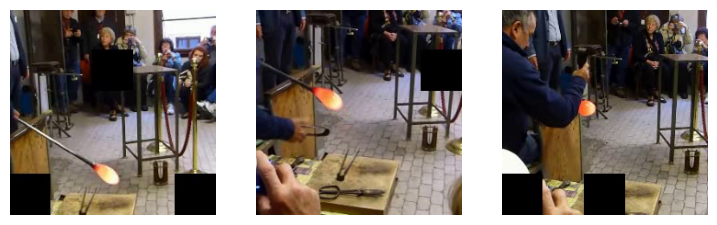

In [15]:
perturber = AccumPerturber(video, segments, classifier_fn=None, hide_color=hide_color)
data, labels = perturber.perturb(num_samples=1, progress_bar=True, save_videos_path=save_path, dont_predict=True)

# Show perturbed videos
plot_frames(load_video(os.path.join(save_path, "3.m4v")))
plot_frames(load_video(os.path.join(save_path, "26.m4v")))
plot_frames(load_video(os.path.join(save_path, "70.m4v")))